In [6]:
import pandas as pd

df = pd.read_csv(
    r'C:\courses\DataManagement and Vis\project\final_integrated_all.csv', 
    low_memory=False
)

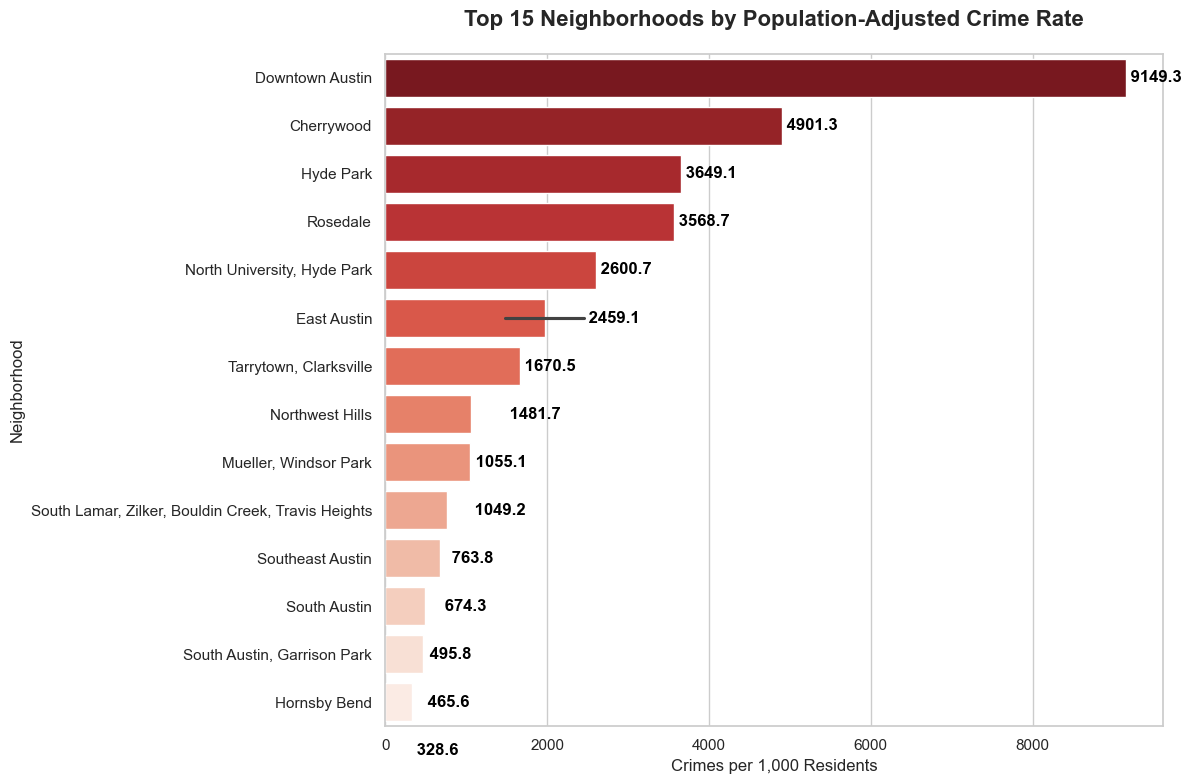

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Process Data
# Group and count crimes
stats = df.groupby(['Neighborhood', 'Population']).size().reset_index(name='crime_count')

# Filter valid population
stats = stats[stats['Population'] > 0]

# Calculate Rate
stats['crimes_per_1k'] = (stats['crime_count'] / stats['Population']) * 1000

# Sort descending
stats = stats.sort_values(by='crimes_per_1k', ascending=False)

# --- NEW STEP: Slice only the top 15 ---
top_15_stats = stats.head(15)

# 3. Visualization
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Fix for the warning: Assign 'y' to 'hue' and set legend=False
ax = sns.barplot(
    data=top_15_stats,
    x='crimes_per_1k',
    y='Neighborhood',
    hue='Neighborhood',  # Assigned to fix deprecation warning
    palette='Reds_r',
    legend=False         # Hide the legend as it's redundant here
)

plt.title('Top 15 Neighborhoods by Population-Adjusted Crime Rate', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Crimes per 1,000 Residents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Add value labels
for i, v in enumerate(top_15_stats['crimes_per_1k']):
    ax.text(v, i, f' {v:.1f}', va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_2972\3752730590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


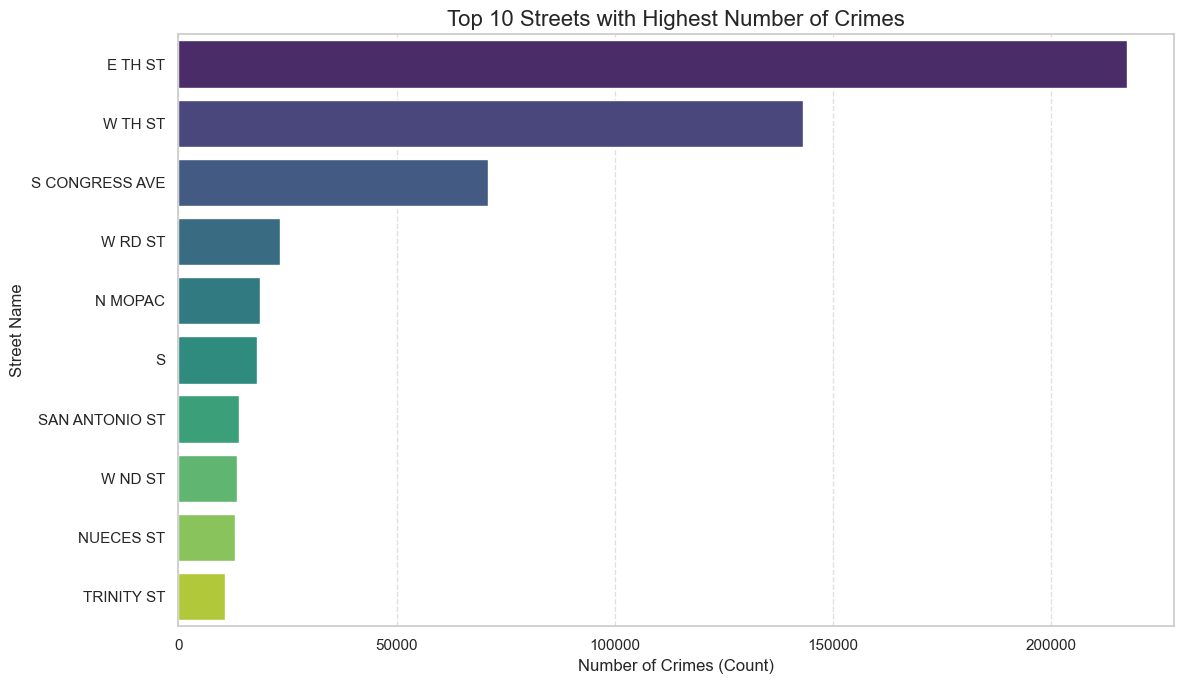

In [7]:

# 2. Replicate the SQL logic: 
# Filter out NULLs, Group by street, and Count
street_crimes = df[df['street_clean1'].notnull()]
street_counts = street_crimes['street_clean1'].value_counts().reset_index()
street_counts.columns = ['street_clean1', 'crime_count']

# 3. Select the Top 10 or Top 15 streets for a cleaner visualization
top_streets = street_counts.head(10)

# 4. Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_streets, 
    x='crime_count', 
    y='street_clean1', 
    palette='viridis'
)

# 5. Add titles and labels
plt.title('Top 10 Streets with Highest Number of Crimes', fontsize=16)
plt.xlabel('Number of Crimes (Count)', fontsize=12)
plt.ylabel('Street Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout and save/show
plt.tight_layout()
plt.savefig('top_streets_visualization.png')
plt.show()

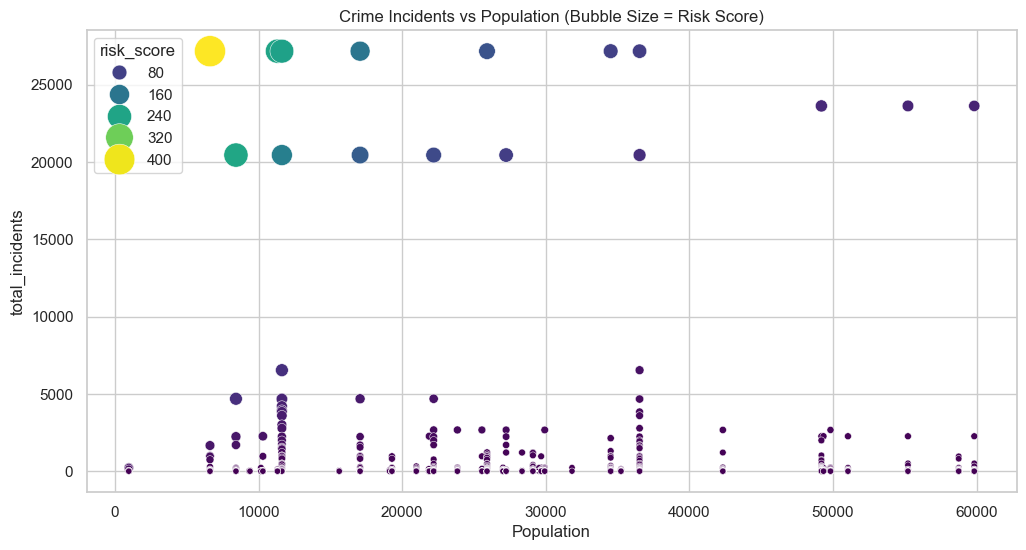

In [11]:
# Filtering: Population > 0 and Street is not NULL
df_filtered = df[(df['Population'] > 0) & (df['street_clean1'].notnull())]

# Grouping: Count incidents per street/neighborhood
risk_df = df_filtered.groupby(['street_clean1', 'Neighborhood', 'Population']).size().reset_index(name='total_incidents')

# Calculating the Risk Score: (Incidents / Population) * 100
risk_df['risk_score'] = (risk_df['total_incidents'] / risk_df['Population']) * 100
risk_df = risk_df.sort_values(by='risk_score', ascending=False)

# --- CHART: POPULATION VS INCIDENTS SCATTER ---
plt.figure(figsize=(12, 6))
sns.scatterplot(data=risk_df, x='Population', y='total_incidents', 
                size='risk_score', hue='risk_score', palette='viridis', sizes=(20, 500))
plt.title('Crime Incidents vs Population (Bubble Size = Risk Score)')
plt.savefig('population_vs_incidents_scatter.png')

   Month_Name  crime_count
0         Jan        61393
1         Feb        58172
2         Mar        66940
3         Apr        71849
4         May        75848
5         Jun        62690
6         Jul        64357
7         Aug        69278
8         Sep        56707
9         Oct        55015
10        Nov        49006
11        Dec        61631


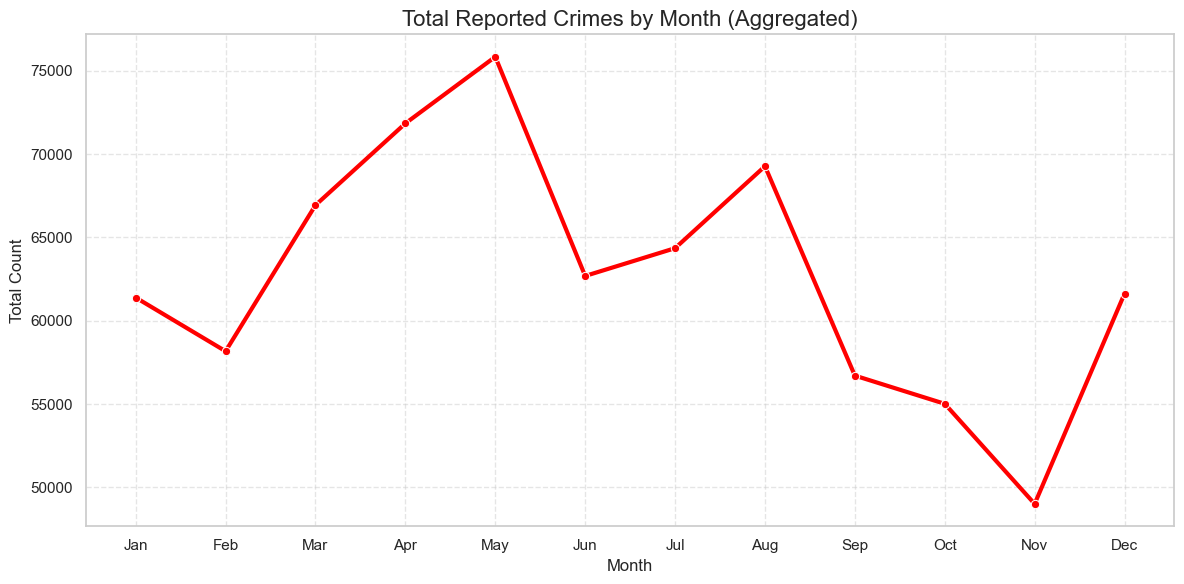

In [39]:
df.columns = df.columns.str.strip()

# 2. Strict Date Parsing (Forces Month/Day/Year)
df['Offense Date'] = pd.to_datetime(df['Offense Date'], format='%m/%d/%Y', errors='coerce')

# 3. Filter for valid dates (Optional check)
df = df.dropna(subset=['Offense Date'])

# 4. Extract JUST the Month Number (Ignoring Year)
df['Month_Num'] = df['Offense Date'].dt.month

# 5. Aggregate: Count Crimes per Month
monthly_counts = df.groupby('Month_Num').size().reset_index(name='crime_count')

# 6. Ensure all 12 months exist (Fills gaps with 0 if any month is missing)
all_months = pd.DataFrame({'Month_Num': range(1, 13)})
monthly_counts = all_months.merge(monthly_counts, on='Month_Num', how='left').fillna(0)

# 7. Map Numbers to Names
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_counts['Month_Name'] = monthly_counts['Month_Num'].map(month_map)

# --- REPORT ---
print(monthly_counts[['Month_Name', 'crime_count']])

# 8. Visualization (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month_Name', y='crime_count', 
             marker='o', color='red', linewidth=3)

plt.title('Total Reported Crimes by Month (Aggregated)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()